In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import tensorflow as tf
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

In [3]:
sample_size = 450
width = 150
height = 150

In [4]:
files = ['A', 'B', 'C']
file_path = "C:/laragon/www/Project/Bloomy/dataset/{}"
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(file_path.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)
        if i.endswith('.png'):
            data[col].append(i)

In [5]:
print(len(data['A']))
print(len(data['B']))
print(len(data['C']))

150
150
150


In [6]:
pd.DataFrame(data).head()

,A,B,C
0,IMG20230517080311_jpg.rf.3451cb7a64a92fbac41b5...,IMG20230517091317_jpg.rf.083cb507bb4840c79d68d...,01_jpg.rf.1b963e5ab9223aeb4afa33f58184af76-rem...
1,IMG20230517080311_jpg.rf.4581690921b38e87fe05d...,IMG20230517091317_jpg.rf.33b6ea9f5f4bd3c88f7f5...,01_jpg.rf.ea7e1c9af777a8c99d8daed8dfed0371-rem...
2,IMG20230517080311_jpg.rf.ac321ed0d06597f17e5b5...,IMG20230517091317_jpg.rf.74bc8142ad28cac66279a...,02_jpg.rf.4b8047d6e8dbd2b2abaf2edd133c9870-rem...
3,IMG20230518073006_jpg.rf.282e6290c6e36f85e91ff...,IMG20230517135103_jpg.rf.86ecc0e202a985beceb16...,03_jpg.rf.112b55c5d0d77e5838ebaf6e26cfc053-rem...
4,IMG20230518073006_jpg.rf.369195516dd07c6c088a7...,IMG20230517135103_jpg.rf.979d18f7af68b6ac8efb0...,06_jpg.rf.bc7f9dc014c941fda44b7133247b73a4-rem...


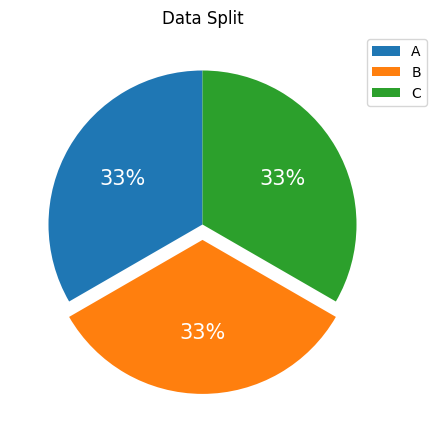

In [7]:
sizes = [len(data['A']), len(data['B']), len(data['C'])]
explode = (0, 0.1, 0) 

plt.figure(figsize=(10, 5), dpi=100)
plt.pie(x=sizes, autopct='%1.0f%%', shadow=False, textprops={'color': "w", "fontsize": 15}, startangle=90, explode=explode)
plt.legend(files, bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [8]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(file_path.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start
print("Calculate Time",round(calculate_time,5))

Compiled Class C
Calculate Time 18.82735


In [9]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(450, 150, 150, 3)

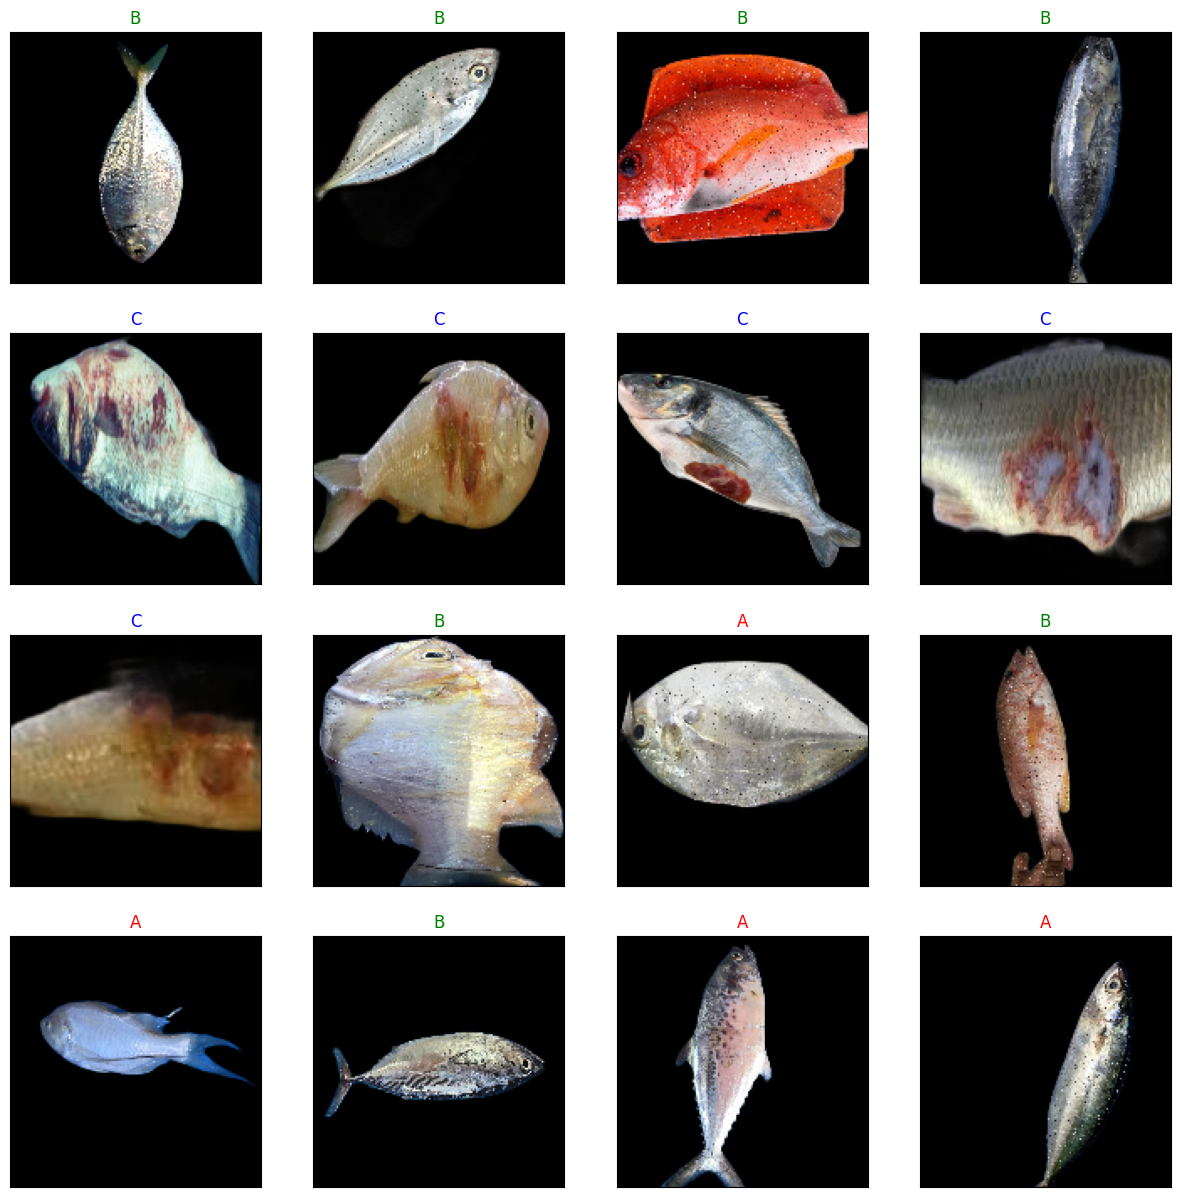

In [10]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='A':
        c='red'
    elif image_target[fig]=='B':
        c='green'
    else:
        c='blue'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [12]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=10,
                                                restore_best_weights=True)

In [15]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels), callbacks=[callback])

Epoch 1/100
10/10 [==============================] - 16s 239ms/step - loss: 1.9217 - accuracy: 0.3619 - val_loss: 1.8523 - val_accuracy: 0.4519
Epoch 2/100
10/10 [==============================] - 1s 55ms/step - loss: 1.8420 - accuracy: 0.4476 - val_loss: 1.7704 - val_accuracy: 0.5481
Epoch 3/100
10/10 [==============================] - 0s 48ms/step - loss: 1.7682 - accuracy: 0.4952 - val_loss: 1.6909 - val_accuracy: 0.5704
Epoch 4/100
10/10 [==============================] - 0s 49ms/step - loss: 1.6981 - accuracy: 0.5397 - val_loss: 1.6337 - val_accuracy: 0.5704
Epoch 5/100
10/10 [==============================] - 0s 49ms/step - loss: 1.6511 - accuracy: 0.5079 - val_loss: 1.5778 - val_accuracy: 0.6074
Epoch 6/100
10/10 [==============================] - 0s 48ms/step - loss: 1.5704 - accuracy: 0.5905 - val_loss: 1.5442 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 50ms/step - loss: 1.5219 - accuracy: 0.6063 - val_loss: 1.5025 - val_accuracy: 0.6148
Epoc

5/5 - 0s - loss: 1.2454 - accuracy: 0.7111 - 76ms/epoch - 15ms/step


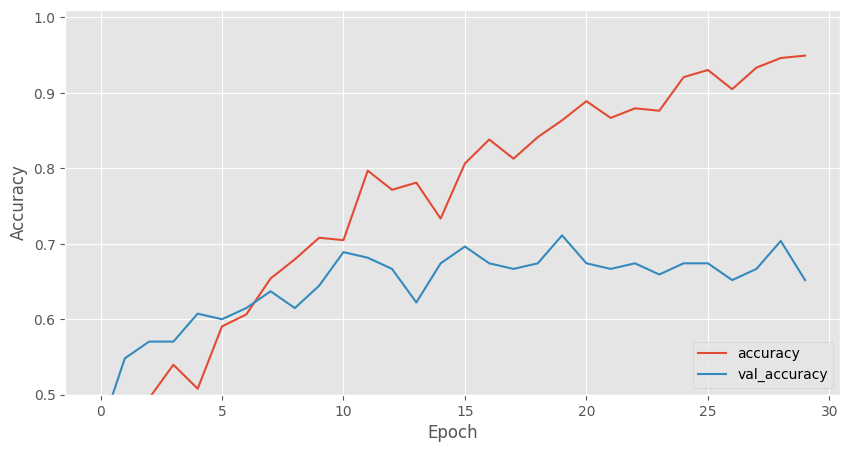

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [17]:
result=model.evaluate(test_images, test_labels)

5/5 [==============================] - 0s 11ms/step - loss: 1.2454 - accuracy: 0.7111


In [18]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 1.2454057931900024
accuracy : 0.7111111283302307


In [19]:
# model.summary()

5/5 [==============================] - 0s 10ms/step


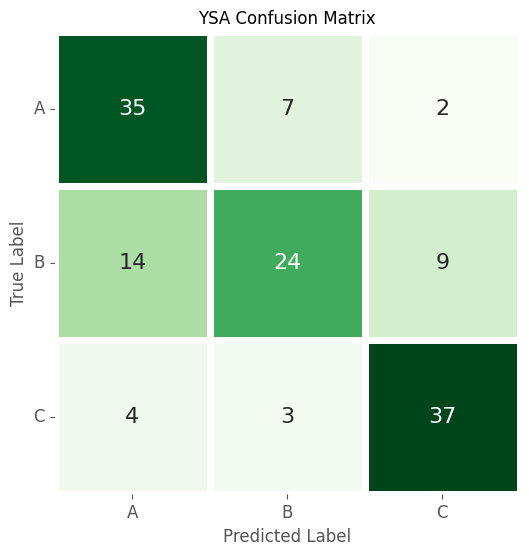

In [20]:
y_pred = model.predict(test_images)

def toClass(pred):

    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index

    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["A","B", "C"], index= ["A","B", "C"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [21]:
def Prediction(image):

    global width, height, files, labels

    img = cv2.resize(image,(width,height))

    test = img / 255.0

    pred = model.predict(np.array([image])).argmax()

    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 22ms/step


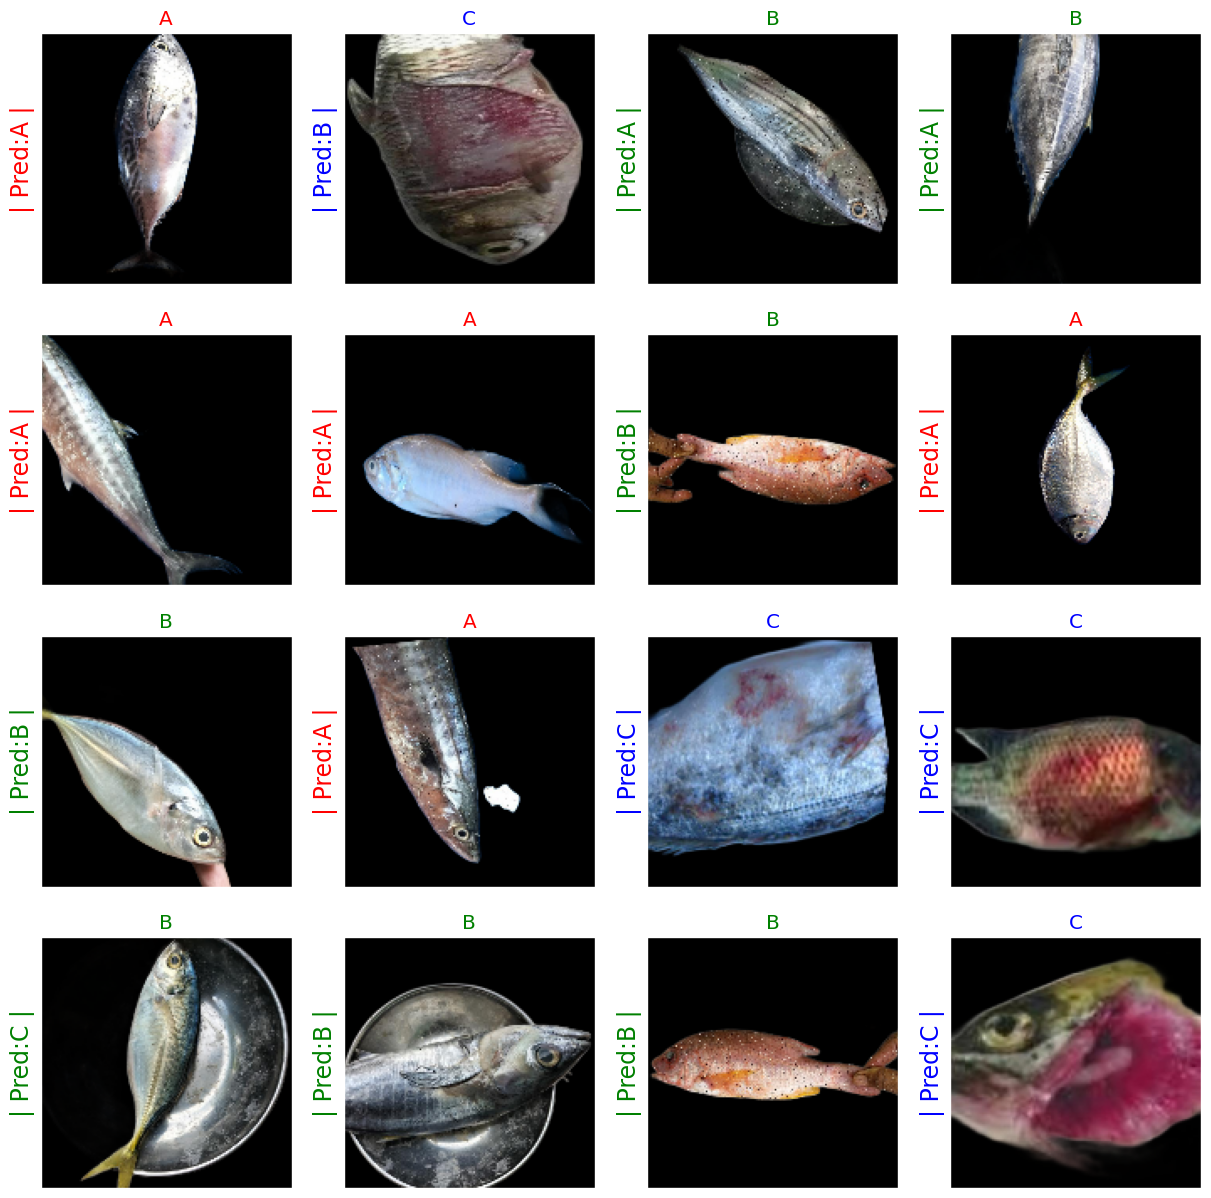

In [22]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='A':
        c='red'
    elif image_target[fig]=='B':
        c='green'
    else:
        c='blue'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

1/1 [==============================] - 0s 32ms/step
Prediction range:
Minimum value: 0.027049398
Maximum value: 0.94105464
Grade: A
Good


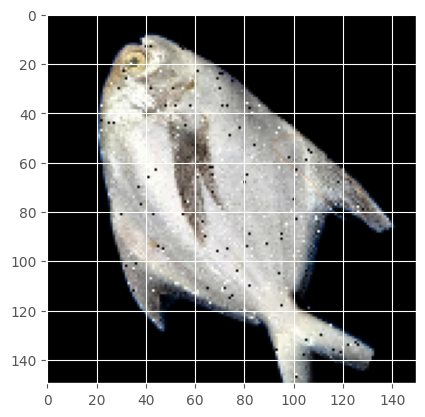

In [25]:


user_path = r"C:\laragon\www\Project\Bloomy\dataset\A"

image_files = os.listdir(user_path)

index = 2
image_file = os.path.join(user_path, image_files[index])

img = image.load_img(image_file, target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0 

classes = model.predict(x, batch_size=1)
nilai_min = np.min(classes)
nilai_max = np.max(classes)

print("Prediction range:")
print("Minimum value:", nilai_min)
print("Maximum value:", nilai_max)

class_list = ['A', 'B', 'C'] 

predicted_class = class_list[np.argmax(classes[0])]
print('Grade:', predicted_class)

if predicted_class == 'A':
    print('Good')
   

elif predicted_class == 'B':
    print('Medium')


elif predicted_class == 'C':
    print('Bad')

In [31]:
# file_location = 'D:\\Users\\Andra\Documents\\Bloomy\\prototype\\fish_grading.h5'
file_location = 'C:\laragon\www\Project\Bloomy\model\\fishgrading.h5'

model.save(file_location)